In [26]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

sns.set_theme(style="whitegrid")


In [27]:
paths = glob("results/cifar/*")
paths = sorted(paths)

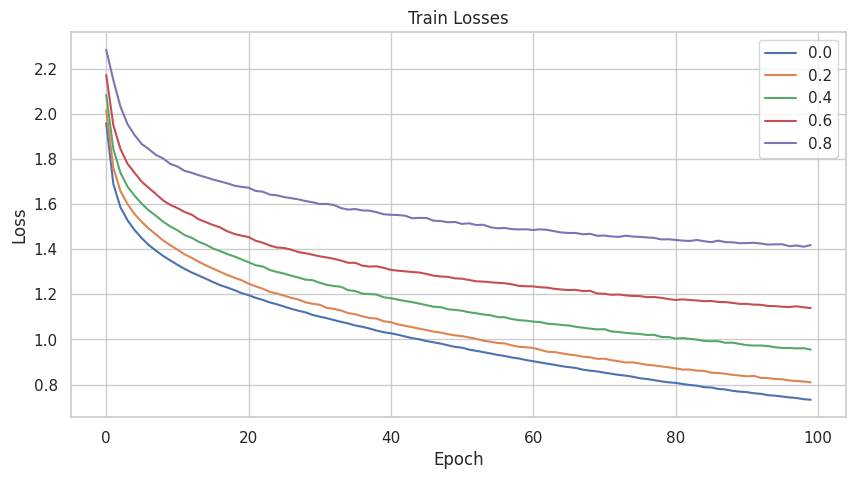

In [46]:
plt.figure(figsize=(10,5))
for path in paths:
    with open(f"{path}/train_losses.json") as f:
        train_losses = json.load(f)
    sns.lineplot(x=range(len(train_losses)), y=train_losses, label=path.split("_")[-1])
    plt.title("Train Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

plt.savefig("results/cifar/train_loss.png")


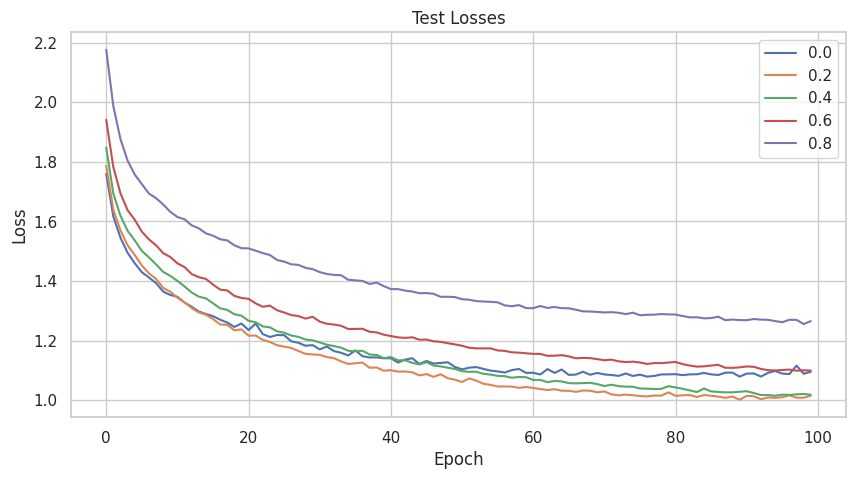

In [45]:
plt.figure(figsize=(10,5))
for path in paths:
    with open(f"{path}/test_losses.json") as f:
        train_losses = json.load(f)
    sns.lineplot(x=range(len(train_losses)), y=train_losses, label=path.split("_")[-1])
    plt.title("Test Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
plt.savefig("results/cifar/test_loss.png")


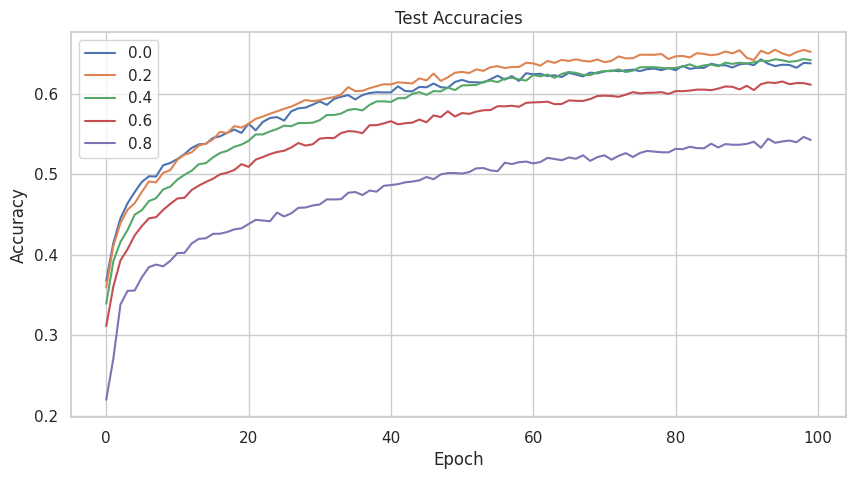

In [44]:
plt.figure(figsize=(10,5))
for path in paths:
    with open(f"{path}/test_accuracies.json") as f:
        train_losses = json.load(f)
    sns.lineplot(x=range(len(train_losses)), y=train_losses, label=path.split("_")[-1])
    plt.title("Test Accuracies")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
plt.savefig("results/cifar/accuracies.png")
    

/tmp/ipykernel_3470/2652932243.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_3470/2652932243.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_3470/2652932243.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


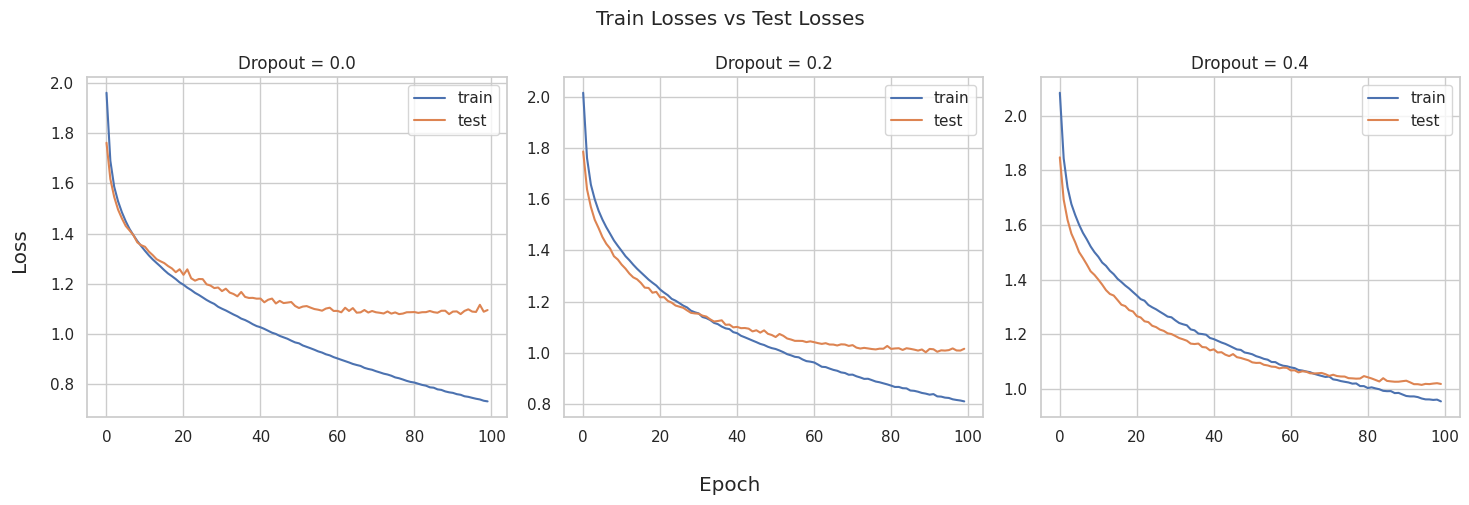

In [50]:
# for each path create a plot of train losses vs test losses
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle("Train Losses vs Test Losses")
plt.title("Train Losses vs Test Losses")
plt.legend()
for ax, path in zip(axs, paths):
    if float(path.split('_')[-1]) > 0.5:
        continue
    with open(f"{path}/train_losses.json") as f:
        train_losses = json.load(f)
    with open(f"{path}/test_losses.json") as f:
        test_losses = json.load(f)
    sns.lineplot(x=range(len(train_losses)), y=train_losses, label="train", ax=ax)
    sns.lineplot(x=range(len(test_losses)), y=test_losses, label="test", ax=ax)
    ax.set_title(f"Dropout = {path.split('_')[-1]}")
    plt.legend()

fig.supxlabel('Epoch')
fig.supylabel('Loss')
plt.tight_layout(rect=[0.01, 0, 1, 1])  # Adjust the bottom margin to fit the super labels
#save 
plt.savefig("results/cifar/losses_train_vs_test.png")